In [5]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [22]:
np.random.seed(42)

def logistic(x):
    return 1 / (1 + np.exp(-x))


beta = 2
x = np.linspace(-1, 1, 100)
p = logistic(beta * x)
data = np.random.binomial(n=1, p=p)

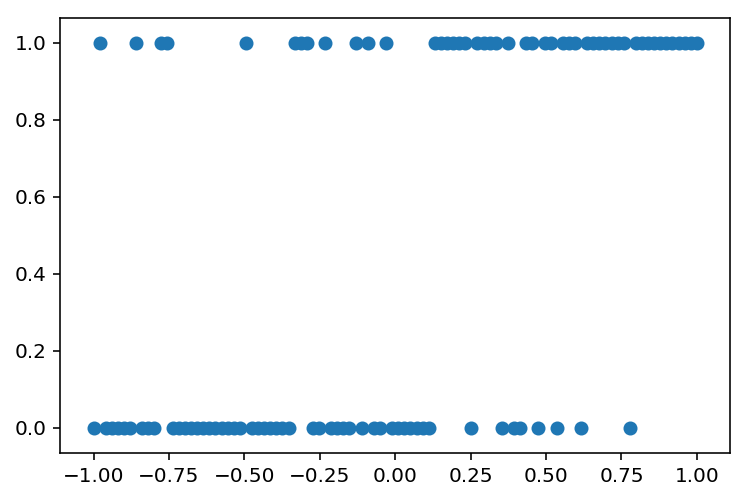

In [23]:
plt.scatter(x, output)

In [24]:
with pm.Model() as model:
    beta = pm.Normal('beta', 0, 100)
    p = logistic(beta * x)
    out = pm.Bernoulli('like', p=p, observed=data)

In [25]:
with model:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:06<00:00, 830.27draws/s] 
/Users/ericmjl/anaconda/envs/curve-fitting-talk/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The acceptance probability does not match the target. It is 0.8929738248398449, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1edfbf28>,
      dtype=object)

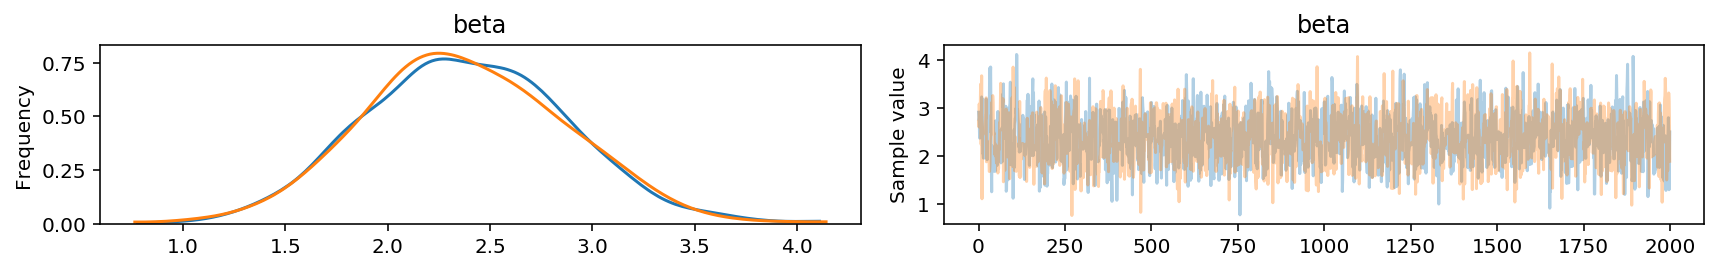

In [26]:
pm.traceplot(trace)